# Name : Liyanage C.S.
# Index No : 190353R

Question 01. <br>
Applying intensity transform

(-0.5, 719.5, 809.5, -0.5)

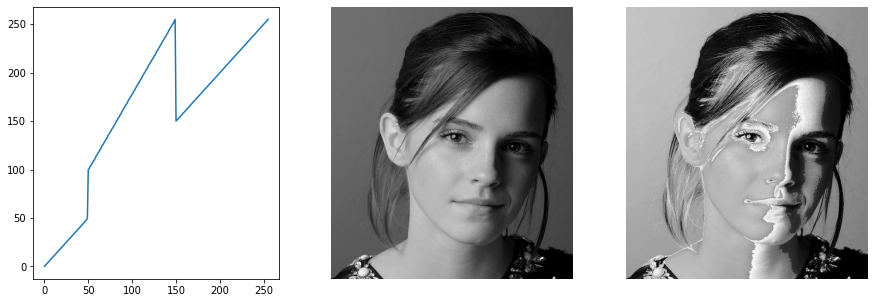

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/emma_gray.jpg')
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
modified = cv.LUT(img , t)
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)
ax[0].plot(t)
ax[1].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(modified , cv.COLOR_BGR2RGB))
ax[2].axis('off')


Question 2.<br> Applying intensity transform to identify white matter and gray matter in brain

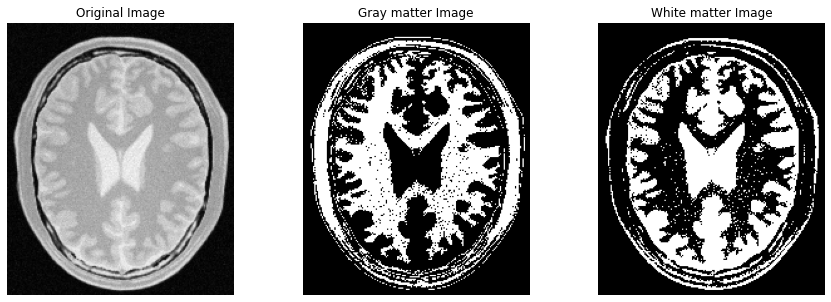

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/brain_proton_density_slice.png')
assert img is not None

t1 = [0]*100
t2 = [255]*80
t3 = [0]*76

t_gray = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
t_white = np.concatenate(([0]*180 , [255]*76) , axis = 0).astype(np.uint8)

gray = cv.LUT(img , t_gray)
white = cv.LUT(img , t_white)
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)
ax[0].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[1].imshow(cv.cvtColor(gray , cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text("Gray matter Image")
ax[2].imshow(cv.cvtColor(white , cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text("White matter Image")

Question 03. <br>Applying gamma correction

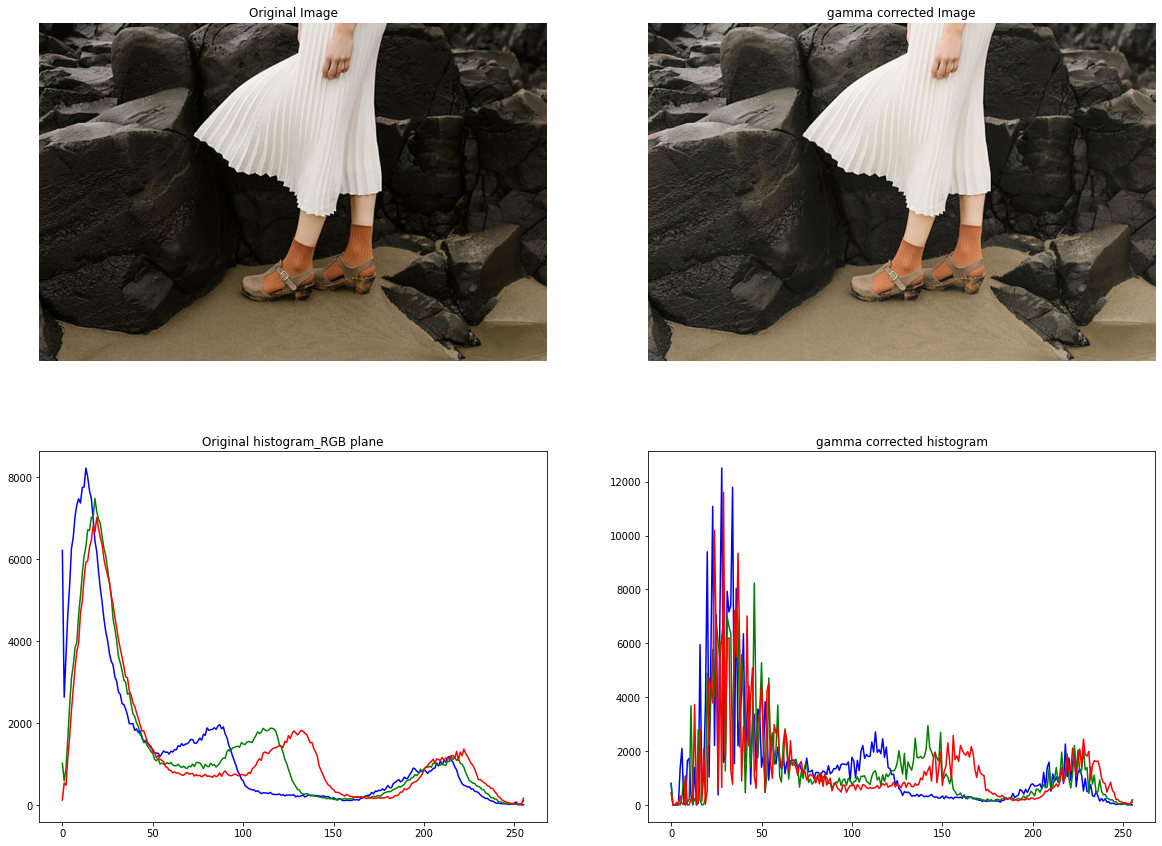

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

colours = ('blue' , 'green' , 'red')

img = cv.imread(r'images/highlights_and_shadows.jpg')
assert img is not None
original_hist=[0,0,0]
for i in range(3):
    original_hist[i] = cv.calcHist([img] , [i] , None , [256] , [0 , 256])

lab_img = cv.cvtColor(img , cv.COLOR_BGR2Lab)

(l , a , b) = cv.split(lab_img)

gamma = 0.7   #can change gamma value to get different outputs
t = np.array([(p/255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
gamma_corrected = cv.LUT(l , t)

lab_img = cv.merge([gamma_corrected , a , b])

lab_hist = [0 , 0 , 0]
for i in range(3):
    lab_hist[i] = cv.calcHist([cv.cvtColor(lab_img , cv.COLOR_Lab2BGR)] , [i] , None , [256] , [0 , 256])

fig , ax = plt.subplots(2 , 2)
fig.set_figwidth(20)
fig.set_figheight(15)

ax[0][0].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text("Original Image")

ax[0][1].imshow(cv.cvtColor(lab_img , cv.COLOR_Lab2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text("gamma corrected Image")

for i in range(3):
    ax[1][0].plot(original_hist[i] , color = colours[i])
ax[1][0].title.set_text("Original histogram_RGB plane")

for i in range(3):
    ax[1][1].plot(lab_hist[i] , color = colours[i])
ax[1][1].title.set_text("gamma corrected histogram")



Question 04.<br>A function for histogram equalization

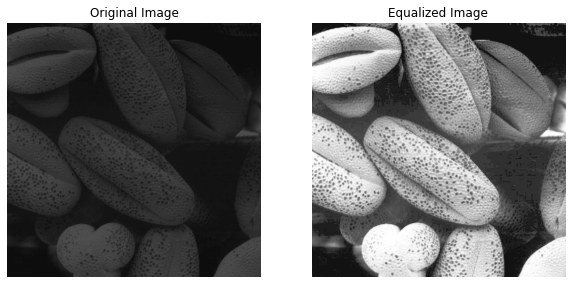

In [67]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def calculate_hist(image):   #calculates the histogram of an image
    histogram = np.zeros(256)
    for i in image:
        for j in i:
            histogram[j]+=1
    return histogram

def create_lookup(image):  #creating the lookup table for equalization process
    histogram = calculate_hist(image)
    for i in range(1,len(histogram)):
        histogram[i] += histogram[i - 1]
    divisor = len(image) * len(image[0])
    lookup = list(map(int , [i*255/divisor for i in histogram]))
    return lookup

def equalize(image): #equalizing the image
    modified = image.copy() #creating a copy so that it does not affect the original image
    lookup_table = create_lookup(image)
    height = len(image)
    width = len(image[0])
    for i in range(height):
        for j in range(width):
            modified[i][j] = lookup_table[image[i][j]]

    return modified

img = cv.imread(r'images/shells.tif' , cv.IMREAD_GRAYSCALE)
assert img is not None

equalized_img = equalize(img)

fig , ax = plt.subplots(1 , 2)
fig.set_figwidth(10)
fig.set_figheight(10)

ax[0].imshow(img , cmap = 'gray' , vmin = 0, vmax = 255)
ax[0].axis('off')
ax[0].title.set_text("Original Image")

ax[1].imshow(equalized_img , cmap = 'gray' , vmin = 0, vmax = 255)
ax[1].axis('off')
ax[1].title.set_text("Equalized Image")
